# Fake tweets prediction: Decision Tree

### How can fake tweets be predicted using variables that have been retrieved from text?

    In this file, I am going to predict whether a tweet is fake or not by using the decision tree. 
    We already created a number of variables that will be used for the prediction. 
    The explanation of these variables can be found in the other file: 'Creating Variables'.
    The multiple variables have been created by different group members.
    The variables have been put into one dataset for the analysis.

In [160]:
# Import all the necessary modules

import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split 
import graphviz
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [135]:
# Import the csv file

df = pd.read_csv("TextfeaturesTweets.csv")

In [136]:
# Drop all the columns that will not be used in the decision tree
df = df.drop(["Unnamed: 0"], axis = 1)

In [137]:
# Fill all NaN's with 0's

df = df.fillna(0)

In [169]:
# Show the head of the df:

df.head()

,label,PUNCT,DET,PROPN,VERB,AUX,ADP,NOUN,ADJ,PRON,...,^,_,{,},Uppercase,Lowercase,compound,pos,neg,neu
0,True,4.0,4.0,5.0,2.0,2.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,6,91,0.4215,0.123,0.0,0.877
1,True,8.0,1.0,0.0,3.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2,89,0.6369,0.245,0.0,0.755
2,Fake,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6,19,0.0000,0.000,0.0,1.000
3,Fake,4.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,13,40,0.0000,0.000,0.0,1.000
4,Fake,3.0,0.0,6.0,0.0,1.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14,52,0.2732,0.116,0.0,0.884


In [139]:
# Count the real and fake tweets

df['label'].value_counts()

0    153462
1     71943
Name: label, dtype: int64

    The dataset contains 153462 fake tweets (labeled: '0') and 71943 real tweets (labeled: '1'). 
    68% of the tweets are fake.

## Steps for the correlation matrix

### Making the correlation matrix

In [140]:
df2 = df.corr()

    Now I only select the left row with 'label', because that is where I want to see the correlations for

In [141]:
df2 = df2.iloc[ :, 0:1]

    I sort the correlation values from high to low. 
    The negative values have already been assessed, and the lowest negative r-score is -0.209340. 
    This is not strong enough for a significant correlation. 

In [142]:
df2 = df2.sort_values(by = 'label', ascending = False)
df2 = df2.iloc[0:10, :]
df2

,label
label,1.000000
Lowercase,0.528716
stopwords_count,0.520910
NOUN,0.499116
char_count,0.458499
Syllables,0.419350
word_count,0.413660
VERB,0.379499
DET,0.374545
ADJ,0.302801


### The column above only shows strong or moderate correlations with a score above 0.3

    Weak  0.1 < r < 0.3 

    Moderate 0.3 < r < 0.6

    Strong > 0.6

### All of the r-scores are between 0.3 and 0.6, what does this mean?

    All of the features in the table are moderately correlated to the variable label. 
    Later, we will see how these features combined can predict fake tweets.
    
**Source:**\
(Moore, Notz, & Flinger, 2013)

## Plotting the graphs of the 3 strongest correlations
    Lowercase, NOUN and stopwords_count have the highest correlations with 0.540601, 0.519353 and 0.498826. 
    Let's see how these relations will look like in a graph. 

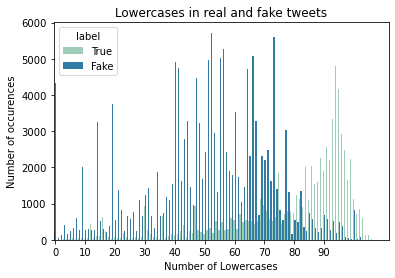

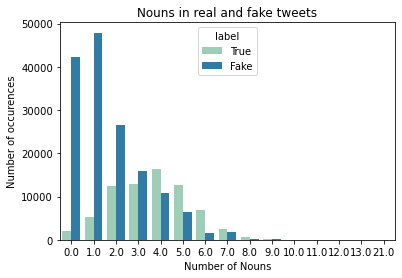

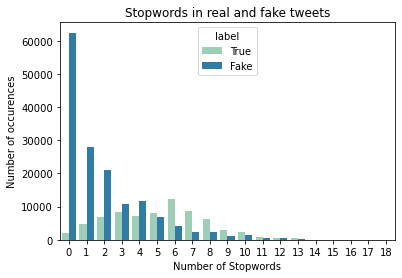

In [143]:
df['label'].replace(0, 'Fake', inplace=True)
df['label'].replace(1, 'True', inplace=True)

sns.countplot(x="Lowercase", hue="label", data=df, palette = "YlGnBu")
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xticks(np.arange(0, max(x), 10))
plt.title('Lowercases in real and fake tweets')
plt.ylabel('Number of occurences')
plt.xlabel('Number of Lowercases')
plt.show()

sns.countplot(x="NOUN", hue="label", data=df, palette = "YlGnBu")
plt.title('Nouns in real and fake tweets')
plt.ylabel('Number of occurences')
plt.xlabel('Number of Nouns')
plt.show()

sns.countplot(x="stopwords_count", hue="label", data=df, palette = "YlGnBu")
plt.title('Stopwords in real and fake tweets')
plt.ylabel('Number of occurences')
plt.xlabel('Number of Stopwords')
plt.show()

### The plots can bee seen as following:
    The light green color represents fake tweets. 
    The dark blue color represents real tweets.
    On the x-axis, the variables have been displayed.
    On the y-axis, the number of occurences is visualised. 
    For example, in the last graph it is shown that +/- 65000 fake tweets contain 0 stopwords. 
    
#### The first graph:
    displays the green color of real tweets more to the right, which stands for number of lowercases.
    The blue bars are more on the left, which stands for fake tweets and fewer lowercases.
    Most of the real tweets contain more lowercases than the fake tweets. 
    
#### In the second graph:
    the blue color stands out on the left side of the graph, which stands for a smaller number of nouns. 
    The real tweets do not have high bars on that side. 
    From 4 nouns and upwards, the real and fake tweets are represented more equally. 
    There are however still more real tweets with 4 or more nouns than fake tweets. 
    As mentioned before, fake tweets represent 68% of the dataset. 
    If the fake and real tweets were equally divided, the real tweets would probably stand out more in this 
    graph on the right side. 
    
#### The last graph: 
    shows that fake tweets contain fewer stopwords (most common English words) than real tweets. 
    A large number of fake tweets do not even contain stopword. 
    If there are few stopwords in a tweet, it is probably fake.
    
    

## No lowercases?    
    That is remarkable! Some tweets contain zero lowercases, nouns or stopwords. 
    Let's investigate this a little bit more...

In [144]:
# Create a dataframe that shows the tweets with the fewest lowercases

df3 = df.sort_values(by = 'Lowercase', ascending = True)
df3.head(3)

,label,PUNCT,DET,PROPN,VERB,AUX,ADP,NOUN,ADJ,PRON,...,^,_,{,},Uppercase,Lowercase,compound,pos,neg,neu
129541,Fake,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.0000,0.000,0.000,1.00
143684,Fake,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.9799,0.427,0.213,0.36
48192,Fake,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9,0,0.0000,0.000,0.000,1.00


    As this dataset unfortuntely does not contain the text of the tweets anymore, 
    I have looked up the tweets with the least lowercases and appended a screenshot. 

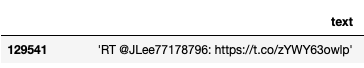

In [145]:
Image(filename='hoi.png')

    This retweet only contains a link, so it is correct that it has 0 lowercases as well as 0 uppercases. 
    The links and retweets have not been included in the counting of the lowercases.
    
    Let's take a look at number 2 and 3 with 0 lowercases:

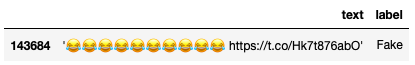

In [146]:
Image(filename='143684.png')

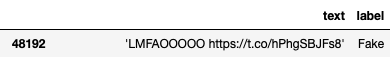

In [147]:
Image(filename='48192.png')

    So if a tweet has no lowercases, it probably contains a link, smileys, or only uppercases. 
    Now we know that the data is correct. 
    
    This can also explain why there are so many tweets without stopwords or nouns. 
    Let's just check two more tweets to be sure:

In [148]:
# Create a dataframe that shows the tweets with the fewest nouns

df4 = df.sort_values(by = 'NOUN', ascending = True)
df4.head(1)

,label,PUNCT,DET,PROPN,VERB,AUX,ADP,NOUN,ADJ,PRON,...,^,_,{,},Uppercase,Lowercase,compound,pos,neg,neu
225404,Fake,3.0,0.0,10.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16,70,0.0,0.0,0.0,1.0


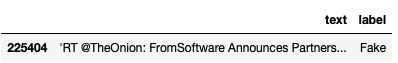

In [149]:
Image(filename='225404.png')

    This tweet indeed has no nouns in our dataset. 
    The dataset we received has incomplete tweets, which is why it's been cut off.
    We will later see if it is still usable for predicting fake tweets.
    
    Now for one more check up, let's look at a tweet with 0 stopwords: 

In [150]:
# Create a dataframe that shows the tweets with the fewest stopwords

df4 = df.sort_values(by = 'stopwords_count', ascending = True)
df4.head(1)

,label,PUNCT,DET,PROPN,VERB,AUX,ADP,NOUN,ADJ,PRON,...,^,_,{,},Uppercase,Lowercase,compound,pos,neg,neu
225404,Fake,3.0,0.0,10.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16,70,0.0,0.0,0.0,1.0


    This is the same tweet. 
    This explains why some tweets contain 0 stopwords. 

# Steps for making the Decision Tree Model:

### Splitting the data in test and train data: 

In [151]:
X = df.iloc[:, 1:] #create the X matrix
y = df['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

### Creating the decision tree:

In [152]:
dtree = DecisionTreeClassifier() #create the tree
dtree = dtree.fit(X_train, y_train) #fit the tree with the train data

### Measuring the accuracy:

In [153]:
y_pred = dtree.predict(X_test)
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test, y_pred))

Accuracy for Decision Tree: 0.9731891987814617


    As mentioned before, the prediction of a tweet as fake would be accurate in 68% of the times. 

    The accuracy for the Decision Tree is 97% procent, which is a lot higher.
    This means that in 97% of the cases the tweet is predicted correctly.
    It is a very precise prediction for tweets.
    
**Source:**\
(ISO 5725-2, 1994)

### Visualising the tree

    The decision tree will be pruned. 
    The pruned model below is less complex, more explainable, and easier to understand than the visualised  
    entire decision tree.
    
    The model will take all variables into account and decide for itself which ones are the most usable. 


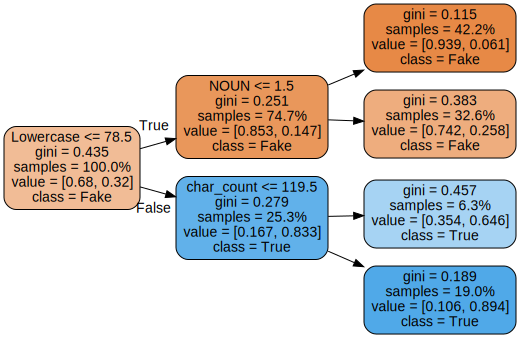

In [154]:
dtree = DecisionTreeClassifier(max_depth=2) #create the tree with max_depth = 2
dtree = dtree.fit(X_train, y_train) #fit the tree with the train data


graph_data = export_graphviz(dtree, out_file=None,
                      feature_names=X.columns.values, 
                      filled=True, rounded=True,
                             rotate = True,
                             proportion = True,
                      class_names=[
                        "Fake",
                          'True'])


graph = graphviz.Source(graph_data) 
graph 

### Explaining the Decision Tree:


#### On the first line:
    The condition on which to split the node to the next branch.
    A distinction is made in the first node whether a tweet contains less than or more than 78.5 lowercases.
    
#### On the second line: 
    The gini coefficient, a measure for the "impurity" of the node. The higher, the more "impure".
    
#### On the third line: 
    The percentage of cases left.
    After splitting the tweets on Lowercases, 74.7% of the tweets had more and 25.3% of the tweets had less than
    the set number of lowercases.
    
#### On the fourth line: 
    The counts per category in the following order: Fake or True
    The first box, it says [0.68, 0.32] which means that 68% of the tweets are fake.
    We have seen this before in the calculation.
    
#### On the fifth line: 
    The most frequent category in the node is shown.
    
#### Follow a path....
    So if a tweet has a small number of lowercases (go up),
    and less than 1.5 nouns (go up), 
    the tweet is in 93.9% of the cases fake!
    
    
**Source:**\
(Ceballos, 2019)

# Evaluation of classification

    To evaluate the model I use the standard approach for a classification problem: 
    making a confusion matrix and calculating accuracy, precision and recall.

In [159]:
y_pred = dtree.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['Fake tweets (actual)', 'Real tweets (actual)'], columns = ['Fake tweets (pred)', 'Real tweets (pred)']) #label and make df
cm

,Fake tweets (pred),Real tweets (pred)
Fake tweets (actual),43308,2914
Real tweets (actual),7333,14067


    
     Let's calculate some numbers using a classification_report.

    I am creating a new Decision tree with all the branches, so max_depth is being removed.
    This increases both precision and recall with respectively 12 and 30 percent.

In [164]:
dtreenew = DecisionTreeClassifier() 

dtreenew = dtreenew.fit(X_train, y_train)
y_pred_new = dtreenew.predict(X_test) #the predicted values
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

        Fake       0.98      0.98      0.98     46222
        True       0.96      0.96      0.96     21400

    accuracy                           0.97     67622
   macro avg       0.97      0.97      0.97     67622
weighted avg       0.97      0.97      0.97     67622




    The precision for fake tweets is very good (very close to 1): 
    about 2% of the suspected fake tweets turn out to be real.
    
    The recall is good as well.
    We only miss about 4% of the fake tweets.
    
    As both the precision and recall are very accurate, 
    this model could very well be used for predicting fake tweets. 
    
    
    If Twitter wants to sample tweets for the filter, 
    so for example 1 in 10 tweets have to go through the algorithm,
    it would be advisable to increase that number by 2 in 10 tweets. 
    
    That way the recall would be even higher, 
    and a smaller percentage of the fake tweets are missed.
    
**Source:**\
(Powers, 2020)

# Bibliography: 

Ceballos, F. (2019). Scikit-Learn Decision Trees Explained. Retrieved 22 January 2021, from https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d


ISO 5725-2. (1994). Accuracy (trueness and precision) of measurement methods and results-Part 1: General principles and definitions. p.1 (1994)


Moore, D. S., Notz, W. I, & Flinger, M. A. (2013). The basic practice of statistics (6th ed.). New York, NY: W. H. Freeman and Company.

Powers, D. M. (2020). Evaluation: from precision, recall and F-measure to ROC, informedness, markedness and correlation. arXiv preprint arXiv:2010.16061.
    